In [1]:
import numpy as np
from numpy import random
from numpy.random import randn
import matplotlib.pyplot as plt
from filterpy.kalman import FixedLagSmoother, KalmanFilter
import kf_book.book_plots as bp
from kf_book.book_plots import figsize
from kf_book.smoothing_internal import *

## Fixed-Lag Smoothing

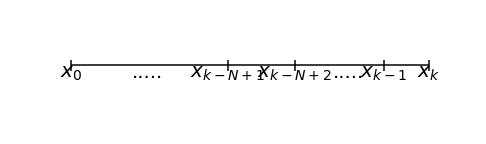

In [2]:
with figsize(y=2):
    show_fixed_lag_numberline()

At step $k$ we can estimate $x_k$ using the normal Kalman filter equations. However, we can make a better estimate for $x_{k-1}$ by using the measurement received for $x_k$. Likewise, we can make a better estimate for $x_{k-2}$ by using the measurements recevied for $x_{k-1}$ and $x_{k}$. We can extend this computation back for an arbitrary $N$ steps. 

The essense of the idea is that instead of having a state vector $\mathbf{x}$ we make an augmented state containing

$$\mathbf{x} = \begin{bmatrix}\mathbf{x}_k \\ \mathbf{x}_{k-1} \\ \vdots\\ \mathbf{x}_{k-N+1}\end{bmatrix}$$

This yields a very large covariance matrix that contains the covariance between states at different steps. FilterPy's class ```FixedLagSmoother``` takes care of all of this computation for you, including creation of the augmented matrices. All you need to do is compose it as if you are using the ```KalmanFilter``` class and then call ```smooth()```, which implements the predict and update steps of the algorithm.

Each call of ```smooth``` computes the estimate for the current measurement, but it also goes back and adjusts the previous N-1 points as well. The smoothed values are contained in the list ```FixedLagSmoother.xSmooth```. If you use ```FixedLagSmoother.x``` you will get the most recent estimate, but it is not smoothed and is no different from a standard Kalman filter output.

standard deviation fixed-lag: 1.481
standard deviation kalman: 2.153


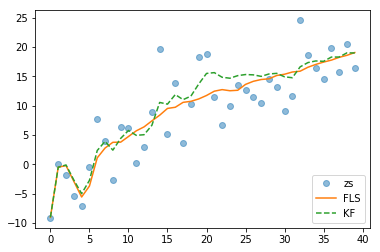

In [3]:
fls = FixedLagSmoother(dim_x=2, dim_z=1, N=8)

fls.x = np.array([0., .5])
fls.F = np.array([[1.,1.],
                  [0.,1.]])

fls.H = np.array([[1.,0.]])
fls.P *= 200
fls.R *= 5.
fls.Q *= 0.001

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., .5])
kf.F = np.array([[1.,1.],
                 [0.,1.]])
kf.H = np.array([[1.,0.]])
kf.P *= 200
kf.R *= 5.
kf.Q *= 0.001

N = 4 # size of lag

nom =  np.array([t/2. for t in range (0, 40)])
zs = np.array([t + random.randn()*5.1 for t in nom])

for z in zs:
    fls.smooth(z)
    
kf_x, _, _, _ = kf.batch_filter(zs)
x_smooth = np.array(fls.xSmooth)[:, 0]


fls_res = abs(x_smooth - nom)
kf_res = abs(kf_x[:, 0] - nom)

plt.plot(zs,'o', alpha=0.5, marker='o', label='zs')
plt.plot(x_smooth, label='FLS')
plt.plot(kf_x[:, 0], label='KF', ls='--')
plt.legend(loc=4)

print('standard deviation fixed-lag: {:.3f}'.format(np.mean(fls_res)))
print('standard deviation kalman: {:.3f}'.format(np.mean(kf_res)))